In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import stats
from tensorflow.keras.regularizers import l1, l2

In [2]:
# Load dataset
file_path = "google_stock_5min_20days_2024.csv"
df = pd.read_csv(file_path)

In [3]:
# Convert Date/Time column to datetime format
if "date" in df.columns:  # Replace "Date" with the actual column name
    df["date"] = pd.to_datetime(df["date"])

In [4]:
# Selecting 'Close' price as target variable
data = df[['4. close']].values

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# Function to create sequences for LSTM
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define time steps (lookback period)
time_steps = 1

# Create sequences
X, y = create_sequences(data_scaled, time_steps)

In [7]:
# Split into training and test sets (80/20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# Build your LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Predicting 'close' price

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Vanshka Pandey\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2650 - val_loss: 0.0225
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - val_loss: 0.0073
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0085 - val_loss: 0.0018
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - val_loss: 3.2686e-04
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - val_loss: 1.7716e-04
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057 - val_loss: 4.3543e-04
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - val_loss: 4.9845e-04
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - val_loss: 7.3197e-05
Epoch 9/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - val_loss: 3.6486e-04
Epoch 10/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051 - val_loss: 5.0992e-04
Epoch 11/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - val_loss: 2.2942e-04
Epoch 12/20
10

In [10]:
# Make predictions (optional)
predictions = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


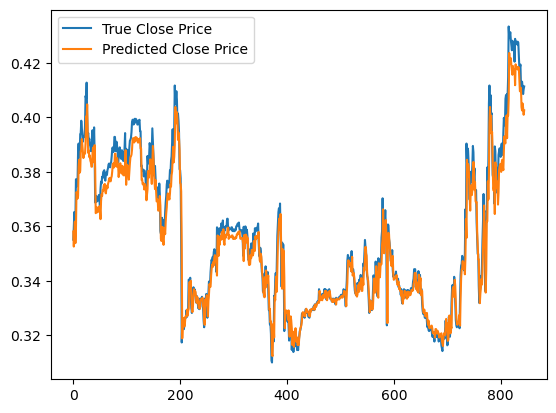

In [11]:
# Visualizing the results (optional)
plt.plot(y_test, label='True Close Price')
plt.plot(predictions, label='Predicted Close Price')
plt.legend()
plt.show()

In [12]:
# Calculate MSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 3.893809983921382e-05
Mean Absolute Error (MAE): 0.0044019171907023385
R² Score: 0.9496150521996564
